## Exploratory Data Analysis: WebMD Reviews of Common Drugs

### Contents:

• Read in scraped data <br>
• Perform QA on data from scrape <br>
• Exploratory Data Analysis <br>
• Insights



In [1]:
import numpy as np
import pandas as pd

In [2]:
reviews = pd.read_csv('webmd_spider.csv')

In [3]:
reviews.sample(10)

,comment,condition,date,drug,ease_of_use,effectiveness,review,satisfaction,sex
44995,1st 3 days slept like a log next 2 days couldn...,Neuropathic Pain,5/15/2009 7:59:58 PM,gabapentin oral,5,2,Reviewer: 75 or over Female on Treatment for ...,3,Female
39411,The first time I was on this medication for C....,Vaginosis caused by Bacteria,12/4/2008 7:47:33 PM,metronidazole oral,1,3,Reviewer: 19-24 Female on Treatment for less ...,2,Female
53544,Is Atenolol a Beta Blocker?,High Blood Pressure,1/16/2009 7:31:28 AM,atenolol oral,5,4,"Reviewer: CheraMom, 45-54 Female on Treatment...",2,Female
48804,Made me tired and sleepy,Pain,9/24/2011 2:42:18 PM,acetaminophen oral,5,4,Reviewer: 19-24 Female on Treatment for less ...,4,Female
55058,I have herniated and bulging discs and annulus...,Other,4/13/2009 6:04:54 PM,baclofen oral,3,3,Reviewer: 35-44 Female on Treatment for less ...,2,Female
29762,Lexapro is a miracle drug for me. Helped grea...,Depression,7/22/2008 8:52:03 AM,Lexapro oral,5,5,"Reviewer: marissa, 45-54 Female on Treatment ...",5,Female
6080,"This pill gave me a headache, nausea, dilated ...",Major Depressive Disorder,12/5/2009 1:08:03 PM,Cymbalta oral,5,1,Reviewer: 35-44 Female on Treatment for less ...,1,Female
34668,i am taking 10 medications. and some of them a...,High Blood Pressure,6/8/2012 1:19:22 AM,lisinopril oral,3,3,"Reviewer: me, 35-44 Male on Treatment for 2 t...",3,Male
10319,"3 months ago, I was very happy with my life an...",Bipolar Depression,1/3/2010 4:20:28 PM,Seroquel oral,3,2,Reviewer: 35-44 Female on Treatment for 1 to ...,1,Female
29150,I have no idea why I was told to take this,Underactive Thyroid,2/24/2014 3:30:53 AM,levothyroxine oral,4,1,"Reviewer: confused, 75 or over Female on Trea...",1,Female


In [4]:
reviews.columns

Index(['comment', 'condition', 'date', 'drug', 'ease_of_use', 'effectiveness',
       'review', 'satisfaction', 'sex'],
      dtype='object')

How many reviews did we scrape?

In [5]:
len(reviews.drug)

55262

How many unique drugs with reviews did we scrape?

In [6]:
reviews['drug'].nunique()

95

How many reviews for each unique drug did we scrape?

In [7]:
reviews['drug'].value_counts()

lisinopril oral          3833
acetaminophen oral       3821
phentermine oral         2163
Cymbalta oral            1936
Lexapro oral             1919
                         ... 
Valium oral                76
Zofran oral                63
Benadryl oral              55
Emgality subcutaneous      54
doxycycline oral           46
Name: drug, Length: 95, dtype: int64

Check null values

In [8]:
np.sum(reviews.isnull())

comment          7
condition        0
date             0
drug             0
ease_of_use      0
effectiveness    0
review           0
satisfaction     0
sex              0
dtype: int64

In [9]:
reviews.fillna('',inplace=True) # replace NA with ''

In [10]:
np.sum(reviews.isnull()) #recheck 

comment          0
condition        0
date             0
drug             0
ease_of_use      0
effectiveness    0
review           0
satisfaction     0
sex              0
dtype: int64

7 null values 

Summary stats of ratings

In [11]:
reviews.describe()

,ease_of_use,effectiveness,satisfaction
count,55262.000000,55262.000000,55262.000000
mean,4.134631,3.553961,3.203015
std,1.237729,1.406416,1.576399
min,1.000000,1.000000,1.000000
25%,4.000000,3.000000,1.000000
50%,5.000000,4.000000,3.000000
75%,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000


Note: 'ease_of_use', 'effectiveness', and 'satisfaction' fields are all 5-max ratings

#### Exploratory Data Analysis
Closer look at content of the reviews, make some groupings, and analyze identified trends

In [12]:
reviews = reviews.rename(columns= {'date': 'date_time'}) #rename date to date_time

In [13]:
reviews.dtypes

comment          object
condition        object
date_time        object
drug             object
ease_of_use       int64
effectiveness     int64
review           object
satisfaction      int64
sex              object
dtype: object

In [14]:
reviews['date_time'] = pd.to_datetime(reviews['date_time']) #change date_time from object to datetime

In [15]:
reviews.sample(10)

,comment,condition,date_time,drug,ease_of_use,effectiveness,review,satisfaction,sex
10949,"I had been on this drug for about six months, ...",High Cholesterol,2010-05-27 22:06:26,simvastatin oral,5,5,"Reviewer: mathguy, 45-54 Male on Treatment fo...",2,Male
39735,"Did not help, had to get a cortisone shot in t...",Joint Damage causing Pain and Loss of Function,2009-01-09 17:24:48,Mobic oral,5,2,"Reviewer: jackson, 55-64 Male on Treatment fo...",2,Male
29186,I was diagnosed with Hypothyroid about a year ...,Underactive Thyroid,2014-12-10 16:41:25,levothyroxine oral,5,2,"Reviewer: btownchaka, 25-34 Male on Treatment...",1,Male
24129,I have been taking this medication for 1 month...,Overweight,2009-07-31 22:11:01,phentermine oral,5,5,"Reviewer: lisa 35, 35-44 Female on Treatment ...",5,Female
26517,NO COMMENT,Asthma,2010-01-11 17:00:55,prednisone oral,5,5,"Reviewer: jodiekramer49, 45-54 Female on Trea...",5,Female
35036,Nasty cough...Quit taking (with Dr. o.k.)and 5...,High Blood Pressure,2013-10-03 14:17:26,lisinopril oral,5,2,"Reviewer: Jackie, 65-74 Female on Treatment f...",1,Female
39779,i can walk mostly without pain. i was in a lot...,Joint Damage causing Pain and Loss of Function,2009-08-15 03:53:05,Mobic oral,5,5,"Reviewer: patrickjax, 35-44 Male on Treatment...",5,Male
34185,"pressure dropped too low...headache, lighthead...",High Blood Pressure,2011-03-27 18:17:06,lisinopril oral,4,3,"Reviewer: GG, 65-74 Male on Treatment for les...",1,Male
11618,I have been taking 25 mcg. Synthroid (Brand) f...,Underactive Thyroid,2010-11-17 21:53:06,Synthroid oral,3,5,"Reviewer: Lauren, 75 or over Female on Treatm...",5,Female
33806,I frist tried a diuretic but ended up fainting...,High Blood Pressure,2010-07-12 11:36:25,lisinopril oral,5,5,"Reviewer: LizzieLange, 45-54 Female on Treatm...",5,Female


In [16]:
reviews.dtypes

comment                  object
condition                object
date_time        datetime64[ns]
drug                     object
ease_of_use               int64
effectiveness             int64
review                   object
satisfaction              int64
sex                      object
dtype: object

In [17]:
import re 

def find_age(x):
    if re.findall('\d+-\d+', x):
        return re.findall('\d+-\d+',x)[0]
    else:
        return 'none'

# function to extract age in the review column

In [18]:
reviews['age'] = reviews.review.apply(find_age)

In [19]:
reviews.sample(10)

,comment,condition,date_time,drug,ease_of_use,effectiveness,review,satisfaction,sex,age
13289,I was told Tramadol would work for my back pai...,Pain,2010-01-08 20:02:15,tramadol oral,5,4,Reviewer: 35-44 Male on Treatment for 1 to le...,3,Male,35-44
34815,side effects. coughing and gagging\r\n,High Blood Pressure,2013-01-01 20:52:45,lisinopril oral,5,2,Reviewer: 55-64 Female (Patient),1,Female,55-64
50963,Just started this medication.,Type 2 Diabetes Mellitus,2011-05-31 20:43:54,Actos oral,3,1,"Reviewer: SweetDee, 35-44 Female on Treatment...",1,Female,35-44
16840,NO COMMENT,Attention Deficit Disorder with Hyperactivity,2009-07-14 19:48:29,Vyvanse oral,4,4,Reviewer: 45-54 Female on Treatment for 1 to ...,4,Female,45-54
25047,A good treatment for weight loss.....,Overweight,2013-05-05 16:34:44,phentermine oral,5,5,"Reviewer: jan spence, 35-44 Female on Treatme...",5,Female,35-44
47593,NO COMMENT,Pain,2009-10-22 11:50:05,acetaminophen oral,5,4,"Reviewer: bgbgt, 35-44 Male on Treatment for ...",4,Male,35-44
15743,HYPOGLYCEMIA is not an issue with me so the me...,Type 2 Diabetes Mellitus,2016-04-05 21:34:22,Trulicity subcutaneous,5,5,"Reviewer: Key West Mike, 55-64 on Treatment fo...",5,Patient,55-64
36996,Been on med for 1 week. It helps the lower bac...,Neuropathic Pain,2009-06-16 12:07:04,Lyrica oral,5,4,"Reviewer: Nathan, 35-44 Male on Treatment for...",3,Male,35-44
350,After first trying Lexapro and having a positi...,Depression,2008-11-14 14:54:38,Celexa oral,5,5,"Reviewer: coach&#39;s wife, 35-44 Female on T...",5,Female,35-44
47238,NO COMMENT,Pain,2009-06-08 06:56:54,acetaminophen oral,1,4,Reviewer: 45-54 Female on Treatment for less ...,1,Female,45-54


In [20]:
age_gender = reviews[['sex', 'age']] 
#new df with only gender and age
age_gender = age_gender[~age_gender.age.str.contains('none')] 
#remove blank age
age_gender = age_gender[~age_gender.sex.str.contains('Patient')]
#remove gender that states patient which is unknown 

In [21]:
from matplotlib import pyplot as plt

ind_lst = sorted(age_gender.groupby('age')['sex'].value_counts().unstack().dropna().index, key=lambda e: int(e.split("-")[0]))
ind_lst

['0-2',
 '3-6',
 '7-12',
 '13-18',
 '19-24',
 '25-34',
 '35-44',
 '45-54',
 '55-64',
 '65-74']

In [22]:
df = age_gender.groupby('age')['sex'].value_counts().unstack().dropna().loc[ind_lst]

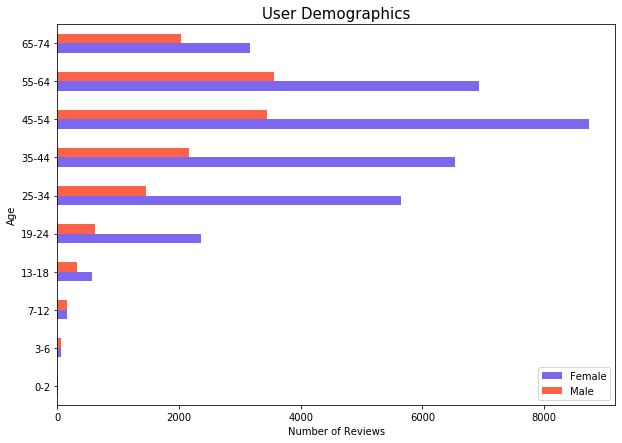

In [23]:
df.plot(kind="barh", color=['mediumslateblue', 'tomato'], figsize=(10,7))
plt.title('User Demographics', fontsize=15)
plt.title('User Demographics', fontsize=15)
plt.xlabel('Number of Reviews')
plt.ylabel('Age')
plt.legend(loc='lower right')
plt.savefig("user_demographics.png",dpi=300,bbox_inches='tight')
plt.show()

In [24]:
age_gender.shape

(48028, 2)

<b>Question #1: How correlated are the ratings? (Effectiveness, Satisfaction, and Ease of Use)</b>

In [25]:
avg_ratings = reviews.groupby('drug').mean()
avg_ratings.sample(10)

,ease_of_use,effectiveness,satisfaction
drug,,,
Valium oral,4.250000,4.039474,4.026316
acetaminophen oral,4.269563,3.677833,3.570531
atenolol oral,4.293622,3.741276,3.351384
tramadol oral,4.161695,3.226730,2.984487
Celexa oral,4.327882,3.647588,3.405560
Synthroid oral,3.874839,3.038710,2.769032
Vyvanse oral,4.168103,3.755172,3.376724
Crestor oral,3.804511,3.253133,2.205514
Bystolic oral,3.972857,3.290000,2.677143


In [26]:
avg_ratings.shape

(95, 3)

(array([0.5, 1.5, 2.5]), <a list of 3 Text yticklabel objects>)

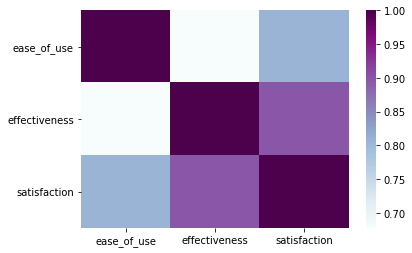

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_df = avg_ratings.corr()
sns.heatmap(corr_df, cmap = 'BuPu')
plt.yticks(rotation=0) 

#correlation heatmap of different types of ratings
#high corrleations for ease of use and satisfaction
#higher correlations for effectivness and satisfaction

In [28]:
import nltk
drug_reviews = reviews[['drug', 'comment']]
drug_reviews

,drug,comment
0,Abilify oral,DIAGNOSED WITH BP/DEPRESSION. ALSO TAKING LAMI...
1,Abilify oral,Caused feelings toward certain people to have ...
2,Abilify oral,the first week was hard. Lots of mania but it ...
3,Abilify oral,"If this is the abilify tablet, I only take 7.5..."
4,Abilify oral,NO COMMENT
...,...,...
55257,baclofen oral,Trying to come off low dose Xanax after 12 yea...
55258,baclofen oral,Prescribed baclofen when I had told the ER doc...
55259,baclofen oral,Used for back pain spasms but high hallucinati...
55260,baclofen oral,i was trying to recover from a bout of trigemi...


In [29]:
valtrex_reviews = drug_reviews[drug_reviews['drug']=='Valtrex oral']
valtrex_reviews['comment'] = valtrex_reviews['comment'].str.lower() 
#change all characters into lowercase in comments

pd.options.mode.chained_assignment = None  # default='warn' #hide warning

/Users/marcuschoi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [30]:
valtrex_reviews['comment'] = valtrex_reviews['comment'].apply(lambda x: re.sub('valtrex',' ',x)) #remove and replace with space
valtrex_reviews['comment'] = valtrex_reviews['comment'].apply(lambda x: re.sub('\s+',' ',x))
valtrex_reviews['comment'] = valtrex_reviews['comment'].apply(lambda x: re.sub('[^\w\s]', '', x))

from nltk.corpus import stopwords
stop = stopwords.words('english')
stop.append(['doctor', 'Cure', 'drug', 'year', 'month', 'week', 'day', 'medication']) #remove words in list
valtrex_reviews['comment'] = valtrex_reviews['comment'].apply(lambda text: " ".join(word for word in text.split() if word not in stop))

valtrex_reviews['comment'].sample(10)

16167        call whatsapp cell phone number 2348107155060
16037    call whatsapp 2348144172934 continue share gre...
16051    live testimony hiv cureable greatful dr osato ...
16031    hsv2 41 yrs get discovered primary care doc sa...
16044                 message code med16 discreet delivery
16153                               whatsapp 2348159922297
16070                 message code med16 discreet delivery
16163    thanks dr ajayi cured herpes suffering herpes ...
16185    suffering herpes disease last four years const...
16159    cell whatsapp number 2347015927966 thank much ...
Name: comment, dtype: object

In [31]:
from wordcloud import WordCloud
word_cloud = WordCloud(background_color="white", max_words=2000, width=800, height=400)
word_cloud.generate(' '.join(valtrex_reviews['comment']))


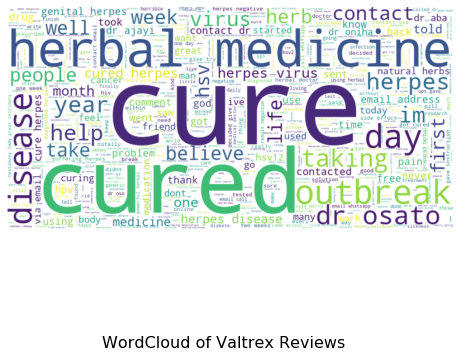

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8, 6))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.suptitle('WordCloud of Valtrex Reviews', fontsize=16,x=0.5, y=0.0)
plt.savefig("WordCloud of Valtrex Reviews.png",dpi=300, bbox_inches='tight')
plt.show()

In [33]:
xanax_reviews = drug_reviews[drug_reviews['drug']=='Xanax oral']
xanax_reviews['comment'] = xanax_reviews['comment'].str.lower()
#change all characters into lowercase in comments

pd.options.mode.chained_assignment = None  #default='warn' 
#hide warning

In [34]:
xanax_reviews['comment'] = xanax_reviews['comment'].apply(lambda x: re.sub('xanax','',x))
xanax_reviews['comment'] = xanax_reviews['comment'].apply(lambda x: re.sub('\s+',' ',x))
xanax_reviews['comment'] = xanax_reviews['comment'].apply(lambda x: re.sub('[^\w\s]', '', x))

stop = stopwords.words('english')
stop.append(['doctor', 'Cure', 'drug', 'year', 'month', 'week', 'day', 'medication', 'taking', 'take']) 
#remove words in list
xanax_reviews['comment'] = xanax_reviews['comment'].apply(lambda text: " ".join(word for word in text.split() if word not in stop))

xanax_reviews['comment'].sample(10)

18851    drug helped trmendously panic anxiety sisorder...
18955    medication ever helped panic attacks addictive...
19286    1mg 4 times daily 5 years anxious nervous pani...
18953    taked alprazolam since released 1980 love way ...
18843    prescribed 2mg 4 times daily mouth panic attac...
18721    drug 2 weeks done wonders couldnt drive withou...
19222    ive taking medication seems one help control a...
19095                                              comment
19063                             taking 20years effective
18974    horrible panic attacks years reluctant leave h...
Name: comment, dtype: object

In [35]:
from wordcloud import WordCloud
word_cloud2 = WordCloud(background_color="white", max_words=2000, width=800, height=400)
word_cloud2.generate(' '.join(xanax_reviews['comment']))

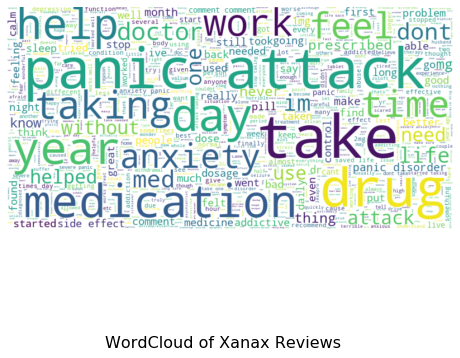

In [36]:
plt.figure(figsize=(8, 6))
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.suptitle('WordCloud of Xanax Reviews', fontsize=16,x=0.5, y=0.0)
plt.savefig("WordCloud of Xanax Reviews.png",dpi=300, bbox_inches='tight')
plt.show()

In [37]:
condition_rank = reviews.condition.value_counts()
condition_rank

Pain                                                               8813
Depression                                                         8053
High Blood Pressure                                                6992
Neuropathic Pain                                                   2936
Chronic Trouble Sleeping                                           2722
Attention Deficit Disorder with Hyperactivity                      2471
Overweight                                                         2163
Major Depressive Disorder                                          1936
High Cholesterol                                                   1793
Underactive Thyroid                                                1596
Other                                                              1576
Panic Disorder                                                     1269
Joint Damage causing Pain and Loss of Function                     1172
Anxious                                                         

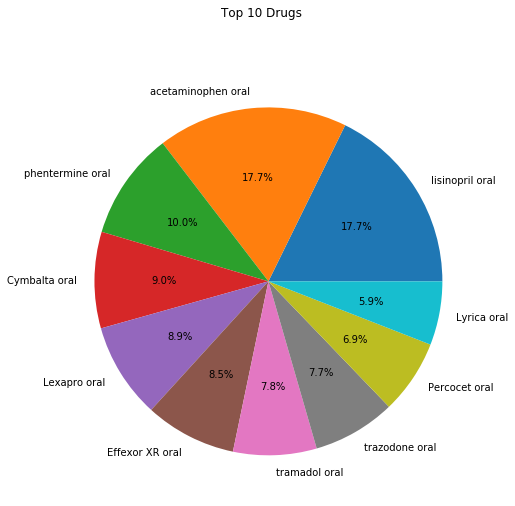

In [38]:
reviews.drug.value_counts().head(10).plot.pie(figsize=(8,8),autopct='%0.01f%%')
plt.ylabel('')
plt.suptitle('Top 10 Drugs')
plt.savefig('Top 10 Drugs witht Most Reviews', dpi=2300, bbox_inches='tight')
plt.show()

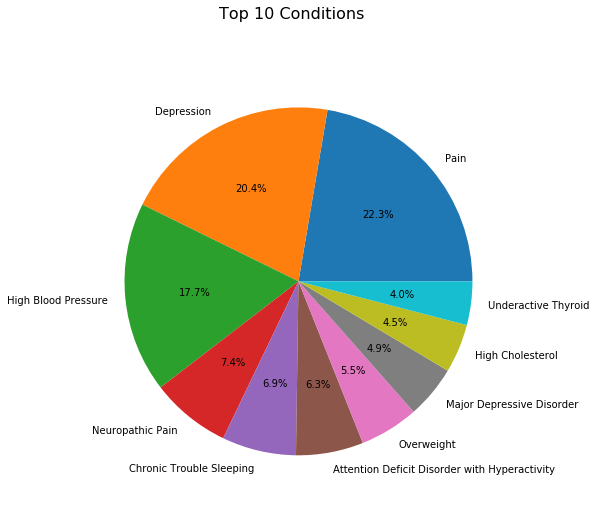

In [39]:
condition_rank.head(10).plot.pie(figsize=(8,8),autopct='%0.01f%%')
plt.ylabel('')
plt.suptitle('Top 10 Conditions', fontsize=16)
plt.savefig("Top 10 Condition.png",dpi=300,bbox_inches='tight')
plt.show()

<b>Question #2: Which drugs are rated "Most Effective"? "Most Satisfactory"? "Easiest to Use"?</b>

In [40]:
group_drugs = reviews.groupby('drug')

In [41]:
group_drugs.size().sort_values(ascending=False)

drug
lisinopril oral          3833
acetaminophen oral       3821
phentermine oral         2163
Cymbalta oral            1936
Lexapro oral             1919
                         ... 
Valium oral                76
Zofran oral                63
Benadryl oral              55
Emgality subcutaneous      54
doxycycline oral           46
Length: 95, dtype: int64

In [42]:
group_drugs.agg(['count', 'mean', 'std'])['effectiveness'].sort_values('mean',ascending=False).head(10)
# count, mean, std of effectiveness of top 10 drugs


,count,mean,std
drug,,,
Valtrex oral,292,4.654110,0.825007
Xanax oral,716,4.493017,0.919840
promethazine oral,113,4.353982,0.990313
phentermine oral,2163,4.275081,1.053457
Benadryl oral,55,4.272727,1.079344
Zofran oral,63,4.269841,1.180573
Adderall XR oral,513,4.142300,1.106278
methadone oral,643,4.096423,1.090901
Prilosec OTC oral,78,4.051282,1.288283


Text(0.5, 1.0, 'Distribution of "Effectiveness" Ratings')

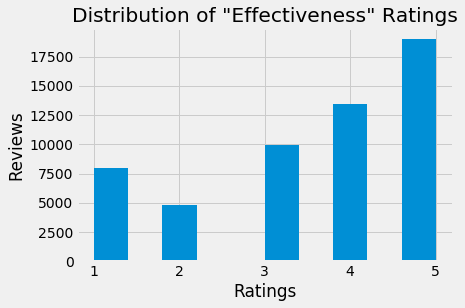

In [53]:
plt.style.use('fivethirtyeight')
plt.hist(reviews['effectiveness'])
plt.ylabel('Reviews')
plt.xlabel('Ratings')
plt.title('Distribution of "Effectiveness" Ratings')

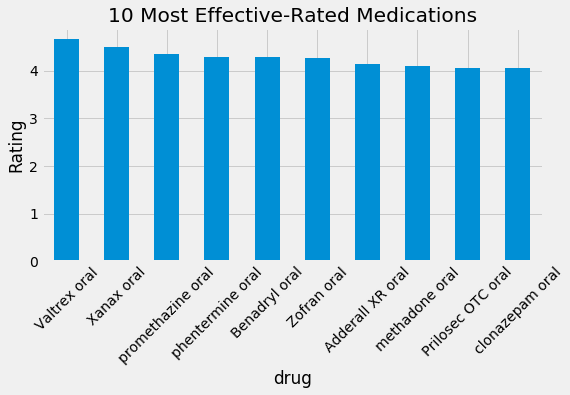

In [52]:
plt.figure(figsize=(8, 4))
group_drugs['effectiveness'].mean().sort_values(ascending=False).head(10).plot.bar()
plt.title('10 Most Effective-Rated Medications')
plt.xticks(rotation=45)
plt.ylabel('Rating')
plt.savefig("10 Most Effective Rated Meds by Avg.png",dpi=300, bbox_inches='tight')
plt.show()

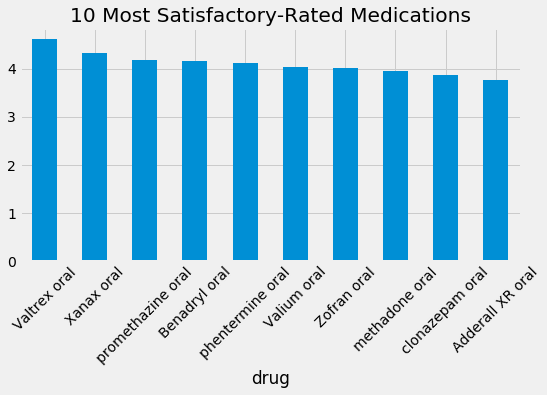

In [45]:
plt.figure(figsize=(8,4))
group_drugs['satisfaction'].mean().sort_values(ascending=False).head(10).plot.bar()
plt.title('10 Most Satisfactory-Rated Medications')
plt.xticks(rotation=45)
plt.savefig("10 Most Satisfactory Rated Meds.png",dpi=300, bbox_inches='tight')
plt.show()

Question 3: Dates
 + Distribution of rating per date/year
 + Distribution of review per year
 + amount of review per year

In [46]:
from datetime import datetime as dt

reviews['date_time'] = pd.to_datetime(reviews['date_time']).dt.normalize()
# turn date time into just year

In [47]:
reviews.columns

Index(['comment', 'condition', 'date_time', 'drug', 'ease_of_use',
       'effectiveness', 'review', 'satisfaction', 'sex', 'age'],
      dtype='object')

In [48]:
#Rating per year
reviews.groupby('date_time')['effectiveness'].size()

date_time
2007-09-18    36
2007-09-19    37
2007-09-20    33
2007-09-21    32
2007-09-22    25
              ..
2020-09-07     4
2020-09-09     3
2020-09-10     2
2020-09-11     2
2020-09-12     2
Name: effectiveness, Length: 4254, dtype: int64

In [49]:
reviews.groupby('date_time')['effectiveness'].mean()
#average effectivness rating per day of a year

date_time
2007-09-18    3.527778
2007-09-19    3.864865
2007-09-20    3.878788
2007-09-21    4.218750
2007-09-22    3.840000
                ...   
2020-09-07    4.500000
2020-09-09    3.666667
2020-09-10    3.000000
2020-09-11    3.000000
2020-09-12    5.000000
Name: effectiveness, Length: 4254, dtype: float64

In [50]:
df = grouped_date.resample('1M').mean()

NameError: name 'grouped_date' is not defined

In [ ]:
df.groupby('date_time')['effectiveness'].mean().plot(figsize=(22,12))
#average rating per year
plt.title("Average Effectiveness Rating Per Year", fontsize=28)
plt.ylabel("Effectiveness Rating")
plt.xlabel("Year")
plt.savefig("Avg Effectiveness Rating by Year.png",dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
reviews.groupby('date_time')['effectiveness'].size().resample('1M').mean()

In [ ]:
#Amount of Review per day of every year
reviews.groupby('date_time')['effectiveness'].size().resample('1W').mean().plot(figsize=(22,10))
plt.title("Amount of Reviews by Year", fontsize=28)
plt.ylabel("Number of Reviews")
plt.xlabel("Year")
plt.savefig("Amount of Reviews by Year.png",dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
### Using DatetimeIndex
grouped_date = reviews.groupby('date_time').agg({'effectiveness': np.mean, 'comment': np.size})

In [ ]:
grouped_date.index

In [ ]:
grouped_date['date_time'] = grouped_date.index

In [ ]:
grouped_date['date_time'] = pd.DatetimeIndex(grouped_date['date_time'])

In [ ]:
grouped_date.dtypes

In [ ]:
grouped_date = grouped_date.set_index('date_time')

In [ ]:
# Select a Particular Date Range
grouped_date['2008'].plot()

In [ ]:
# Amount of Reviews for 2008
grouped_date['2007']['comment'].plot(figsize=(15,10))
plt.title("Amount of Reviews for 2008")
plt.show()

In [ ]:
# Amount of Reviews for 2008-2009
grouped_date['2007':'2009']['comment'].plot(figsize=(23,10))
plt.title("Amount of Reviews for 2007-2009")
plt.show()

In [ ]:
#Distribution of Effectiveness Rating for Over Time
grouped_date['2008':'2009']['effectiveness'].plot(figsize=(17,10))
plt.title("Distribution of Effectiveness Rating Over Time")
plt.show()

In [ ]:
#ratings were highest in June 2008

In [ ]:
#Distribution of Effectiveness Rating for Over Time
grouped_date['2008':'2012']['effectiveness'].plot(figsize=(23,10))
plt.title("Distribution of Effectiveness Rating Over Time")
plt.show()

In [ ]:
grouped_date['2008-04'].plot()

In [ ]:
#Distribution of Effectiveness Rating for Over Two Months
grouped_date['2008-04':'2008-07']['effectiveness'].plot(figsize=(23,10))
plt.title("Distribution of Effectiveness Rating Over Time")
plt.show()